In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
# 生成数据
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [3]:
negative_samples.shape

(1000, 2)

In [4]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [5]:
# 生成标签
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [7]:
targets.shape

(2000, 1)

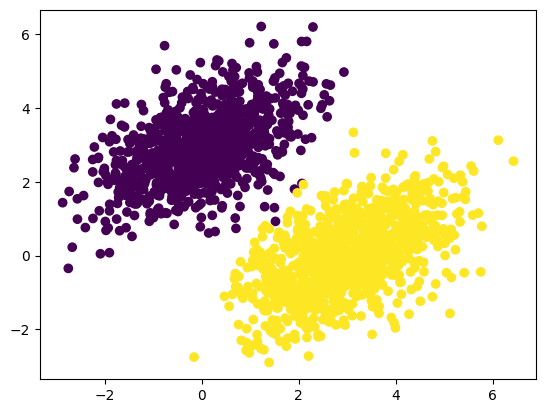

In [8]:
# 绘制数据集
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [9]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [10]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [11]:
# mse损失函数
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [12]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [13]:
# 训练
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.1619
Loss at step 1: 0.2498
Loss at step 2: 0.1302
Loss at step 3: 0.1072
Loss at step 4: 0.0979
Loss at step 5: 0.0910
Loss at step 6: 0.0850
Loss at step 7: 0.0796
Loss at step 8: 0.0746
Loss at step 9: 0.0701
Loss at step 10: 0.0660
Loss at step 11: 0.0623
Loss at step 12: 0.0589
Loss at step 13: 0.0558
Loss at step 14: 0.0530
Loss at step 15: 0.0505
Loss at step 16: 0.0482
Loss at step 17: 0.0461
Loss at step 18: 0.0442
Loss at step 19: 0.0424
Loss at step 20: 0.0408
Loss at step 21: 0.0394
Loss at step 22: 0.0381
Loss at step 23: 0.0369
Loss at step 24: 0.0358
Loss at step 25: 0.0348
Loss at step 26: 0.0339
Loss at step 27: 0.0331
Loss at step 28: 0.0324
Loss at step 29: 0.0317
Loss at step 30: 0.0311
Loss at step 31: 0.0306
Loss at step 32: 0.0301
Loss at step 33: 0.0296
Loss at step 34: 0.0292
Loss at step 35: 0.0288
Loss at step 36: 0.0284
Loss at step 37: 0.0281
Loss at step 38: 0.0278
Loss at step 39: 0.0276


In [14]:
# 预测
predictions = model(inputs)

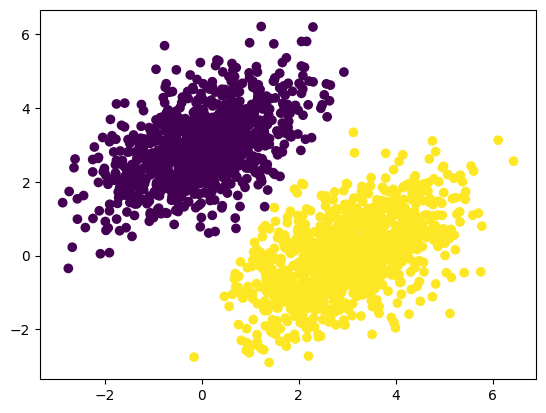

In [15]:
# 绘制预测分类结果
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

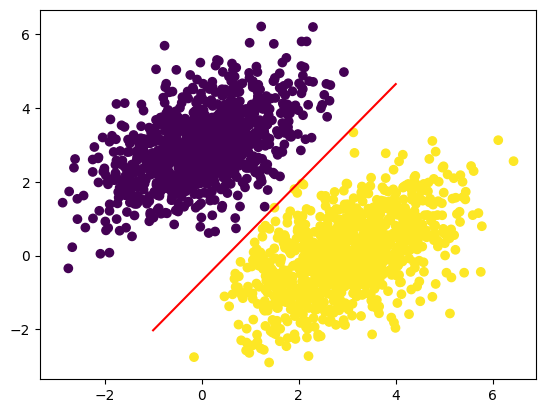

In [16]:
# 绘制分割线
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)